In [2]:
# Importamos las librerias necesarias 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# leemos el archivo csv
df=pd.read_csv("train.csv")

In [4]:
# veo la cantidad de filas y columnas de mi archivo
df.shape

(1460, 81)

## Limpieza de datos nulos en filas y columnas

In [5]:
# verifico que hayan columnas de tipo NaN o nulas 
df.isnull().values.any()

True

In [6]:
len(df)

1460

In [10]:
# Elimino las columnas que tengan mas de 1000 datos nulos
df=df.dropna(thresh=1000, axis=1)

In [11]:
# vemos que se eliminaron 5 columnas 
df.shape

(1460, 76)

In [12]:

df.isnull().values.any()

True

In [13]:
len(df)

1460

In [15]:
# elimino las filas que tengan datos nulos
df=df.dropna()

In [16]:
len(df)

1094

In [17]:
# vemos que se eliminaron 366 filas
df.shape

(1094, 76)

In [18]:
# revisar las columnas para determinar de que tipo son

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [20]:
# eliminar columnas que sus valores mas recurrentes sean 0

df.drop(["BsmtFinSF2", "2ndFlrSF", "LowQualFinSF", "BsmtFullBath", "BsmtHalfBath", "HalfBath","EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal"], axis=1, inplace= True)

In [21]:
df.shape

(1094, 65)

In [22]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,TA,TA,Y,0,61,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,TA,TA,Y,298,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,TA,TA,Y,0,42,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,TA,TA,Y,0,35,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,TA,TA,Y,192,84,12,2008,WD,Normal,250000


In [23]:
# vemos el tipo de dato con que estamos trabajando
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 65, dtype: object

In [24]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
count,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,...,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000
mean,727.375686,56.128885,70.759598,10132.346435,6.247715,5.575868,1972.412249,1985.915905,109.855576,448.191956,...,6.570384,0.610603,1978.565814,1.879342,503.760512,94.341865,46.946984,6.335466,2007.786106,187033.263254
std,420.955488,41.976345,24.508859,8212.249621,1.366797,1.066500,31.189752,20.930772,190.667459,468.728095,...,1.584486,0.633118,25.934444,0.658586,192.261314,122.624615,64.820019,2.694558,1.334307,83165.332151
min,1.000000,20.000000,21.000000,1300.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,...,3.000000,0.000000,1900.000000,1.000000,160.000000,0.000000,0.000000,1.000000,2006.000000,35311.000000
25%,366.500000,20.000000,60.000000,7606.750000,5.000000,5.000000,1953.000000,1967.000000,0.000000,0.000000,...,5.000000,0.000000,1960.000000,1.000000,360.000000,0.000000,0.000000,5.000000,2007.000000,132500.000000
50%,723.500000,50.000000,70.000000,9444.500000,6.000000,5.000000,1975.000000,1995.000000,0.000000,384.500000,...,6.000000,1.000000,1982.000000,2.000000,484.000000,0.000000,28.000000,6.000000,2008.000000,165750.000000
75%,1093.750000,70.000000,80.000000,11387.250000,7.000000,6.000000,2003.000000,2005.000000,171.750000,712.750000,...,7.000000,1.000000,2003.000000,2.000000,602.500000,169.750000,68.000000,8.000000,2009.000000,221000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,12.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,12.000000,2010.000000,755000.000000


In [101]:
# Variable para almacenar las columnas numericas que se utilizaran
columnas_numericas=["SalePrice","TotRmsAbvGrd","GrLivArea", "FullBath",
                   "MSSubClass", "LotArea","OverallQual","OverallCond",
                   "YearBuilt", "BsmtFinSF1", "TotalBsmtSF", "1stFlrSF",
                   "BedroomAbvGr", "KitchenAbvGr", "Fireplaces", "GarageCars",
                   "GarageArea"]

In [103]:
for i in columnas_numericas:
    print(df[i].value_counts())

140000    18
135000    14
155000    14
145000    12
130000    10
          ..
174900     1
246578     1
68400      1
142125     1
206000     1
Name: SalePrice, Length: 560, dtype: int64
6     317
7     238
5     208
8     148
4      60
9      56
10     37
11     15
12      8
3       7
Name: TotRmsAbvGrd, dtype: int64
864     16
894     11
1456     9
1200     7
987      7
        ..
1320     1
1319     1
1317     1
752      1
2057     1
Name: GrLivArea, Length: 720, dtype: int64
2    586
1    476
3     26
0      6
Name: FullBath, dtype: int64
20     411
60     227
50     114
120     66
160     53
70      52
30      47
80      37
90      24
190     19
75      13
85      13
45       9
180      6
40       3
Name: MSSubClass, dtype: int64
9600     23
7200     20
6000     16
8400     13
9000     12
         ..
8925      1
8935      1
10991     1
8944      1
8190      1
Name: LotArea, Length: 806, dtype: int64
5     292
6     270
7     259
8     139
4      66
9      42
10     16
3       8
2  

In [105]:
# eliminacion de valores atipicos segun la media y la desviacion estandar
for j in columnas_numericas:
    def reject_outliers(df):
        d = np.mean(df[j])
        s = np.std(df[j])
        df = df[(df[j]>(d-2*s)) & (df[j]<(d+2*s))]
        return df

    print(df[j])

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1094, dtype: int64
0       8
1       6
2       6
3       7
4       9
       ..
1455    7
1456    7
1457    9
1458    5
1459    6
Name: TotRmsAbvGrd, Length: 1094, dtype: int64
0       1710
1       1262
2       1786
3       1717
4       2198
        ... 
1455    1647
1456    2073
1457    2340
1458    1078
1459    1256
Name: GrLivArea, Length: 1094, dtype: int64
0       2
1       2
2       2
3       1
4       2
       ..
1455    2
1456    2
1457    2
1458    1
1459    1
Name: FullBath, Length: 1094, dtype: int64
0       60
1       20
2       60
3       70
4       60
        ..
1455    60
1456    20
1457    70
1458    20
1459    20
Name: MSSubClass, Length: 1094, dtype: int64
0        8450
1        9600
2       11250
3        9550
4       14260
        ...  
1455     7917
1456    13175
1457     9042
14

array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'OverallQual'}>],
       [<AxesSubplot:title={'center':'OverallCond'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>],
       [<AxesSubplot:title={'center':'BsmtUnfSF'}>,
        <AxesSubplot:title={'center':'TotalBsmtSF'}>,
        <AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'FullBath'}>],
       [<AxesSubplot:title={'center':'BedroomAbvGr'}>,
        <AxesSubplot:title={'center':'KitchenAbvGr'}>,
        <AxesSubplot:title={'center':'TotRmsAbvGrd'}>,
        <AxesSubplot:title={'center':'Fireplaces'

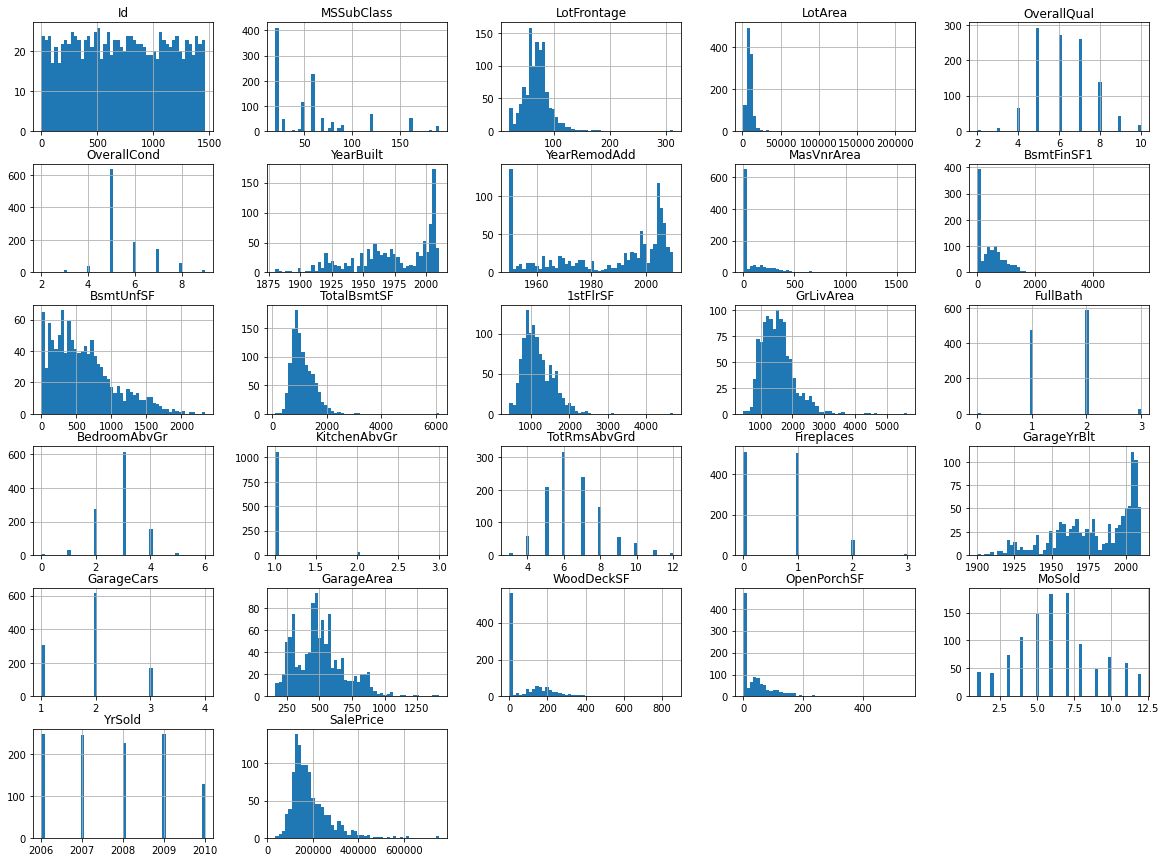

In [43]:
#grafico de todos los datos numericos
df.hist(bins=50, figsize=(20,15))

In [106]:
# verifico que ninguna de las columnas que usare tengan datos nulos
for i in columnas_numericas:
    print(pd.isnull(df[i]).values.ravel().sum())

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


array([[<AxesSubplot:xlabel='SalePrice', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='FullBath', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='MSSubClass', ylabel='SalePrice'>],
       [<AxesSubplot:xlabel='SalePrice', ylabel='TotRmsAbvGrd'>,
        <AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='TotRmsAbvGrd'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='TotRmsAbvGrd'>,
        <AxesSubplot:xlabel='FullBath', ylabel='TotRmsAbvGrd'>,
        <AxesSubplot:xlabel='MSSubClass', ylabel='TotRmsAbvGrd'>],
       [<AxesSubplot:xlabel='SalePrice', ylabel='GrLivArea'>,
        <AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='GrLivArea'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='GrLivArea'>,
        <AxesSubplot:xlabel='FullBath', ylabel='GrLivArea'>,
        <AxesSubplot:xlabel='MSSubClass', ylabel='GrLivArea'>],
       [<AxesSubplot:xlabel='SalePrice', yl

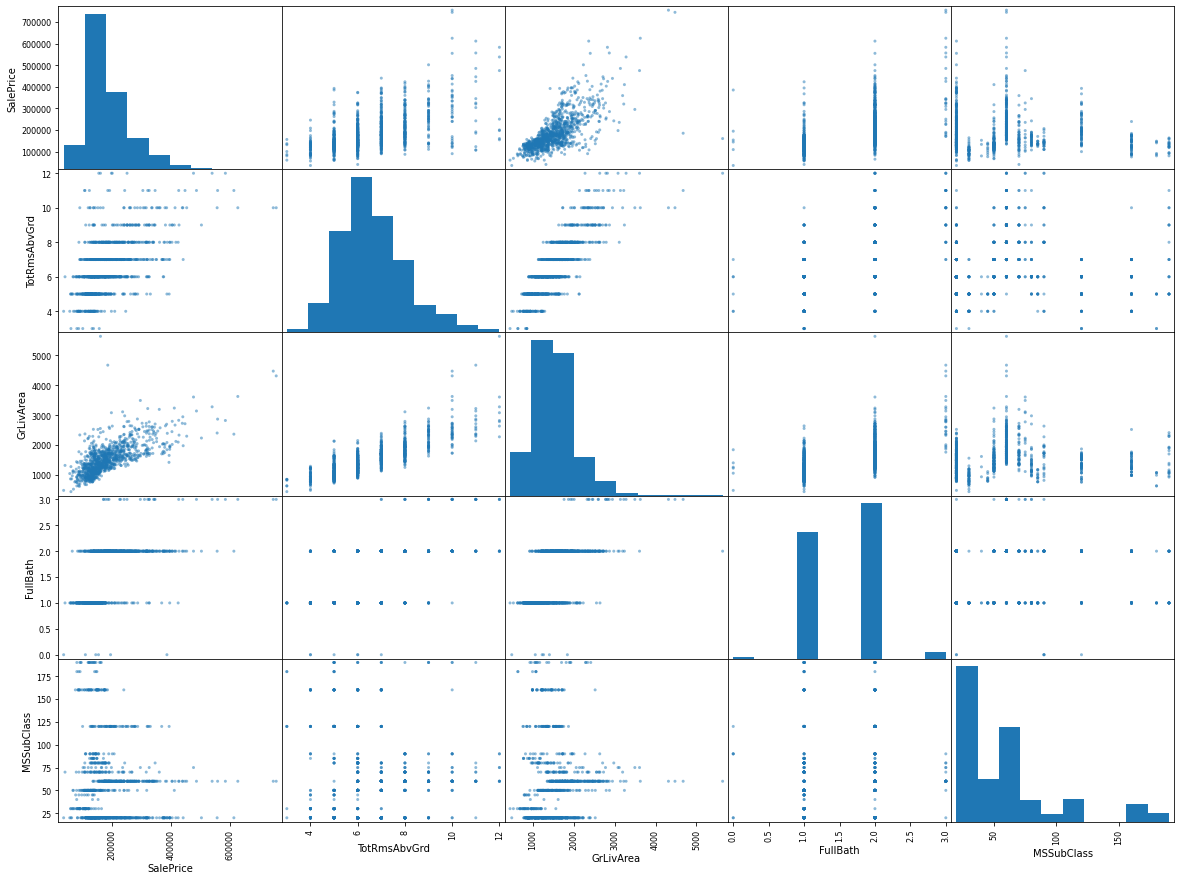

In [112]:
#hacer diagramas de correlacion

from pandas.plotting import scatter_matrix

#hacemos la grafica de dispersion
columnas_numericas_part1= ["SalePrice","TotRmsAbvGrd","GrLivArea", "FullBath",
                   "MSSubClass"]
scatter_matrix(df[columnas_numericas_part1], figsize=(20,15))

array([[<AxesSubplot:xlabel='SalePrice', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='OverallCond', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>],
       [<AxesSubplot:xlabel='SalePrice', ylabel='LotArea'>,
        <AxesSubplot:xlabel='LotArea', ylabel='LotArea'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='LotArea'>,
        <AxesSubplot:xlabel='OverallCond', ylabel='LotArea'>,
        <AxesSubplot:xlabel='YearBuilt', ylabel='LotArea'>],
       [<AxesSubplot:xlabel='SalePrice', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='LotArea', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='OverallCond', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='YearBuilt', ylabel='OverallQual'>],
       [<AxesSubplot:xlabel='SalePrice', ylabel='OverallCond'

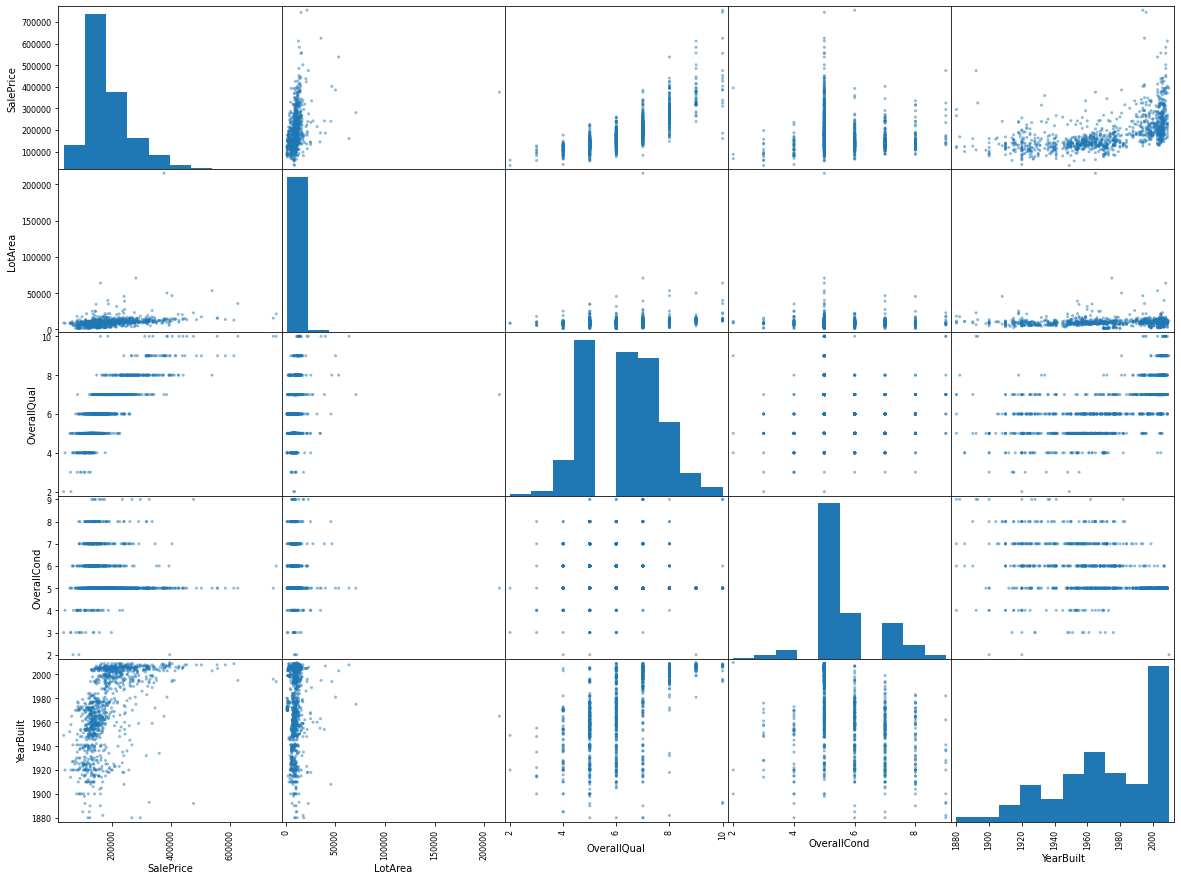

In [113]:
columnas_numericas_part2= ["SalePrice","LotArea","OverallQual","OverallCond",
                   "YearBuilt"]
scatter_matrix(df[columnas_numericas_part2], figsize=(20,15))

array([[<AxesSubplot:xlabel='SalePrice', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='BsmtFinSF1', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='BedroomAbvGr', ylabel='SalePrice'>],
       [<AxesSubplot:xlabel='SalePrice', ylabel='BsmtFinSF1'>,
        <AxesSubplot:xlabel='BsmtFinSF1', ylabel='BsmtFinSF1'>,
        <AxesSubplot:xlabel='TotalBsmtSF', ylabel='BsmtFinSF1'>,
        <AxesSubplot:xlabel='1stFlrSF', ylabel='BsmtFinSF1'>,
        <AxesSubplot:xlabel='BedroomAbvGr', ylabel='BsmtFinSF1'>],
       [<AxesSubplot:xlabel='SalePrice', ylabel='TotalBsmtSF'>,
        <AxesSubplot:xlabel='BsmtFinSF1', ylabel='TotalBsmtSF'>,
        <AxesSubplot:xlabel='TotalBsmtSF', ylabel='TotalBsmtSF'>,
        <AxesSubplot:xlabel='1stFlrSF', ylabel='TotalBsmtSF'>,
        <AxesSubplot:xlabel='BedroomAbvGr', ylabel='TotalBsmtSF'>],
       [<AxesSubplot:xlabel='SalePric

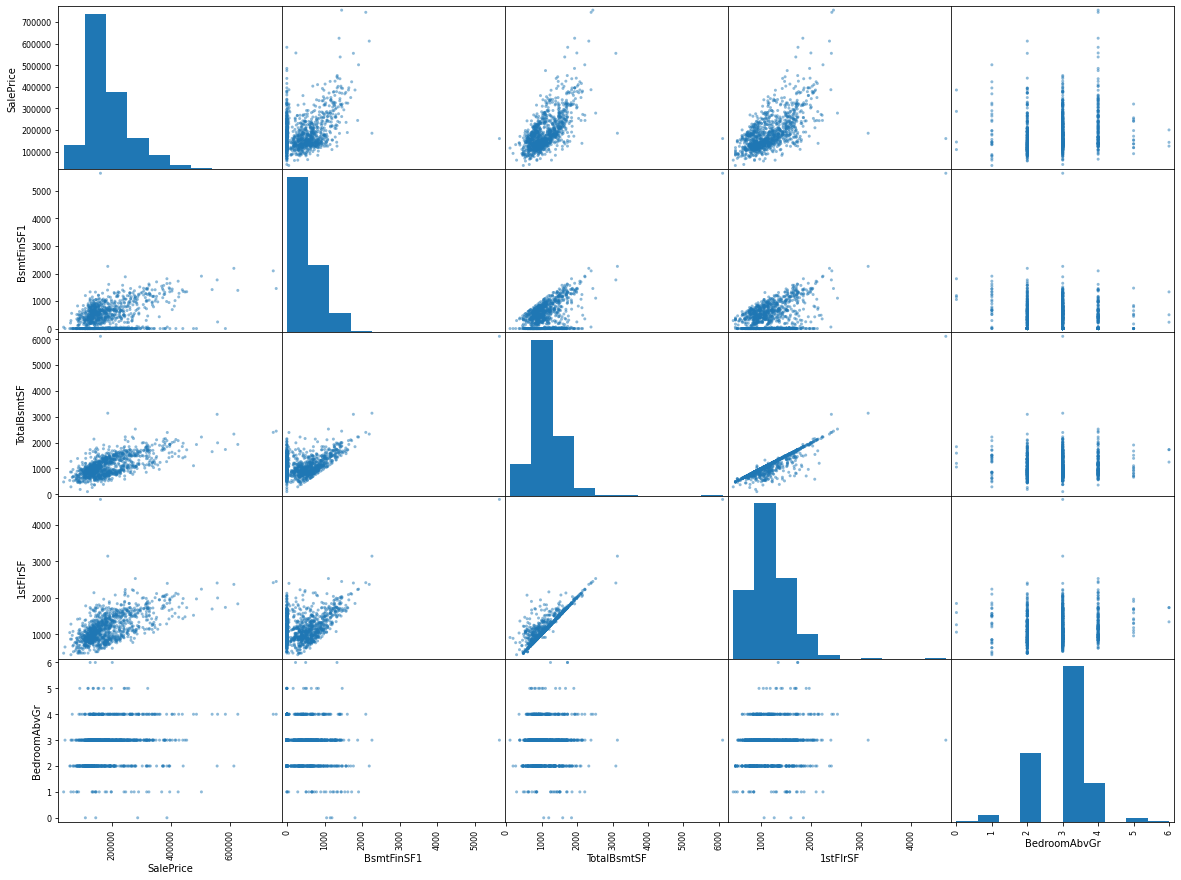

In [114]:
columnas_numericas_part3= ["SalePrice","BsmtFinSF1", "TotalBsmtSF", "1stFlrSF",
                   "BedroomAbvGr"]
scatter_matrix(df[columnas_numericas_part3], figsize=(20,15))

array([[<AxesSubplot:xlabel='SalePrice', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='KitchenAbvGr', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='Fireplaces', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>],
       [<AxesSubplot:xlabel='SalePrice', ylabel='KitchenAbvGr'>,
        <AxesSubplot:xlabel='KitchenAbvGr', ylabel='KitchenAbvGr'>,
        <AxesSubplot:xlabel='Fireplaces', ylabel='KitchenAbvGr'>,
        <AxesSubplot:xlabel='GarageCars', ylabel='KitchenAbvGr'>,
        <AxesSubplot:xlabel='GarageArea', ylabel='KitchenAbvGr'>],
       [<AxesSubplot:xlabel='SalePrice', ylabel='Fireplaces'>,
        <AxesSubplot:xlabel='KitchenAbvGr', ylabel='Fireplaces'>,
        <AxesSubplot:xlabel='Fireplaces', ylabel='Fireplaces'>,
        <AxesSubplot:xlabel='GarageCars', ylabel='Fireplaces'>,
        <AxesSubplot:xlabel='GarageArea', ylabel='Fireplaces'>],
       [<AxesSubplot:xlabel='

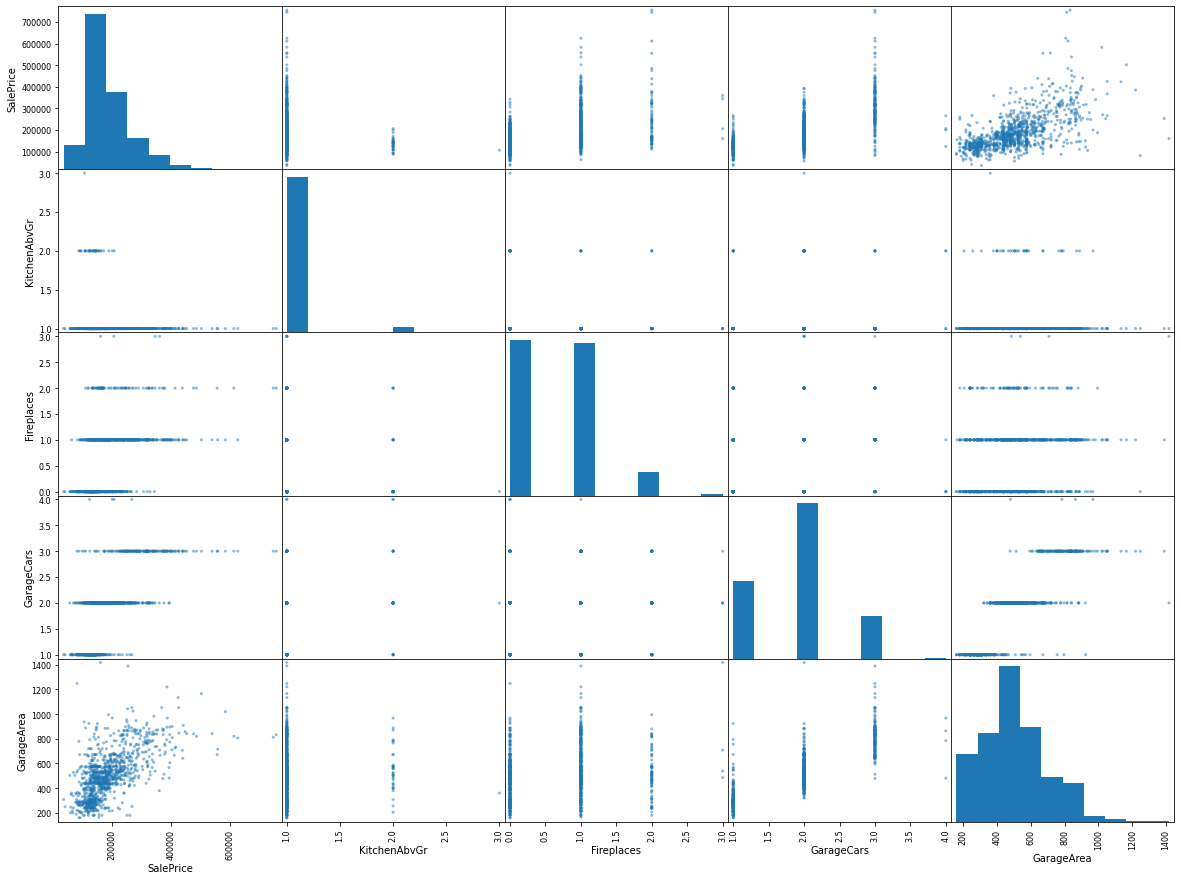

In [115]:
columnas_numericas_part4= ["SalePrice","KitchenAbvGr", "Fireplaces", "GarageCars",
                   "GarageArea"]
scatter_matrix(df[columnas_numericas_part4], figsize=(20,15))

In [46]:
#matriz correlacion numerica y visual

import seaborn as sn


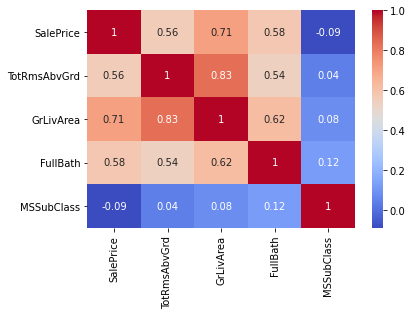

In [116]:
corrMatrix=df[columnas_numericas_part1].corr().round(2)
sn.heatmap( corrMatrix, annot=True , cmap="coolwarm")
plt.show()

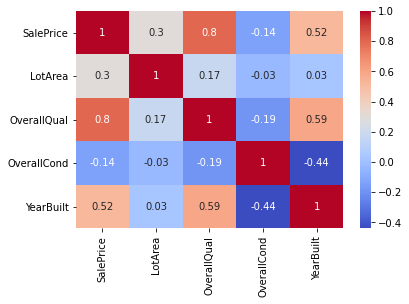

In [117]:
corrMatrix=df[columnas_numericas_part2].corr().round(2)
sn.heatmap( corrMatrix, annot=True , cmap="coolwarm")
plt.show()

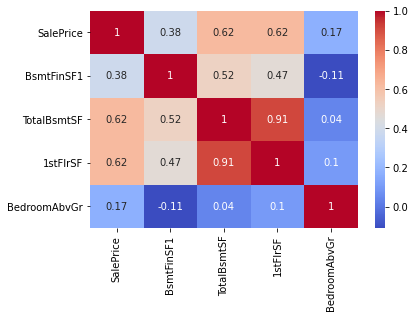

In [118]:
corrMatrix=df[columnas_numericas_part3].corr().round(2)
sn.heatmap( corrMatrix, annot=True , cmap="coolwarm")
plt.show()

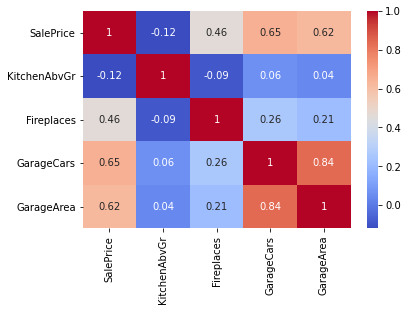

In [119]:
corrMatrix=df[columnas_numericas_part4].corr().round(2)
sn.heatmap( corrMatrix, annot=True , cmap="coolwarm")
plt.show()

### Con los graficos podemos definir que datos se correlacionan mas con la columna de "SalePrice"

#### vemos que la columna "KitchenAbvGr" y "OverallCond" no guardan una correlacion significativa con el precio, asi que podemos eliminarla de la lista 

In [120]:
columnas_numericas_def=["SalePrice","TotRmsAbvGrd","GrLivArea", "FullBath",
                   "MSSubClass", "LotArea","OverallQual",
                   "YearBuilt", "BsmtFinSF1", "TotalBsmtSF", "1stFlrSF",
                   "BedroomAbvGr", "Fireplaces", "GarageCars",
                   "GarageArea"]

## preparacion de los datos para el algoritmo

In [121]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,TA,TA,Y,0,61,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,TA,TA,Y,298,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,TA,TA,Y,0,42,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,TA,TA,Y,0,35,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,TA,TA,Y,192,84,12,2008,WD,Normal,250000


In [122]:
X=df[["TotRmsAbvGrd","GrLivArea", "FullBath","MSSubClass", "LotArea","OverallQual",
    "YearBuilt", "BsmtFinSF1", "TotalBsmtSF", "1stFlrSF","BedroomAbvGr", "Fireplaces", "GarageCars","GarageArea"]]
y=df["SalePrice"]

In [123]:
from sklearn.model_selection import train_test_split

In [124]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7)

In [125]:
X_train

,TotRmsAbvGrd,GrLivArea,FullBath,MSSubClass,LotArea,OverallQual,YearBuilt,BsmtFinSF1,TotalBsmtSF,1stFlrSF,BedroomAbvGr,Fireplaces,GarageCars,GarageArea
248,8,1668,2,60,11317,7,2003,0,840,840,3,0,2,500
1264,5,1337,2,120,4060,6,1998,266,1405,1337,2,0,2,511
1459,6,1256,1,20,9937,5,1965,830,1256,1256,3,0,1,276
1351,8,1716,1,60,9247,6,1962,319,858,858,4,1,2,490
472,5,1072,1,180,3675,6,2005,459,547,1072,2,0,2,525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844,7,1416,1,50,12665,5,1915,0,876,876,4,1,3,720
57,7,1720,2,60,11645,7,2004,0,860,860,3,0,2,565
847,5,864,1,20,15523,5,1972,460,864,864,3,1,1,338
324,11,2978,2,80,11275,7,1967,0,710,1898,5,1,2,564


## Metodo de Regresion Lineal

In [126]:
from sklearn.linear_model import LinearRegression


In [127]:
ln=LinearRegression()

In [128]:
ln.fit(X_train,y_train)

LinearRegression()

In [129]:
coeff_df = pd.DataFrame(ln.coef_, X.columns, columns=["Coefficient"])

In [130]:
coeff_df

,Coefficient
TotRmsAbvGrd,5380.636794
GrLivArea,54.349836
FullBath,-2912.939196
MSSubClass,-167.470285
LotArea,0.811953
OverallQual,18295.801932
YearBuilt,350.377429
BsmtFinSF1,27.856662
TotalBsmtSF,33.070090
1stFlrSF,-25.040047


In [131]:
predictions=ln.predict(X_test)

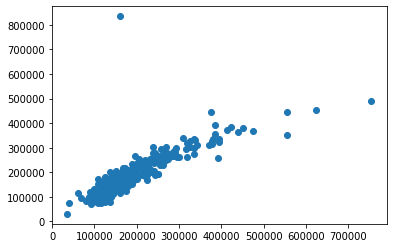

In [132]:
plt.scatter(y_test, predictions)

/home/franyelith23/my_env/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


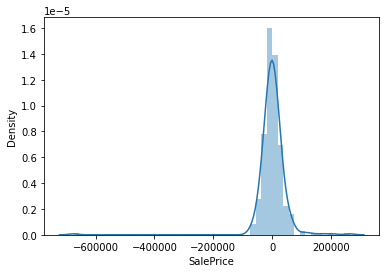

In [133]:
sn.distplot((y_test-predictions), bins=50);